# Finding Heavy Traffic Indicators on I-94

In this project, we will analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and the dataset can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
# Importing the pandas library and reading in the dataset
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#Examining the first and last rows of the traffic dataset
traffic.head()
print(traffic.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [2]:
# Getting more detailed information about the fraffic dataset
traffic.info()
# The dataset has 48,204 rows of data, 9 columns distributed as by dtype as follows:
# 3 are float64, 2 are int64 and 5 are object type
# Non of the columns have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Note that traffic data used in this project was recoreded on a station located approximately midway between Minneapolis and Saint Paul. And that the station only recorded westbound traffic (cars moving from east to west).

From this we can deduce that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

# Analysing Traffic Volume Distribution

In this section, we plot a histogram to visualize the distribution of the `traffic_volume` column. When we use Matplotlib inside Jupyter, we also need to add the `%matplotlib inline` magic that enables Jupyter to generate the graphs.

In [3]:
# Importing Matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

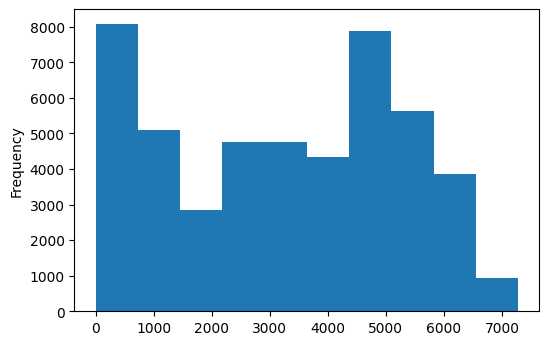

In [4]:
# Plotting `traffic_volume` histogram using pandas method
traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
# Showing the statistics of the `traffic_volume` column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were 1193 cars or fewer passing the station each hour, about 75% of the time, the traffic volume was four times as much accounting for more than 4933 cars or more.

# Extracting Nightime and Daytime Traffic Volumes

If we take it that nighttime and daytime might influence traffic volume, we may have to do our analysis by comparing daytime with nighttime data.

To do this, we start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

## Isolating Daytime and Nighttime Data

In [7]:
# Trasforming the `date_time` column to datetime format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


The result above shows that there is a significant difference in row numbers between day and night which could be due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

# Histogram Plots for Daytime and Nighttime

Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

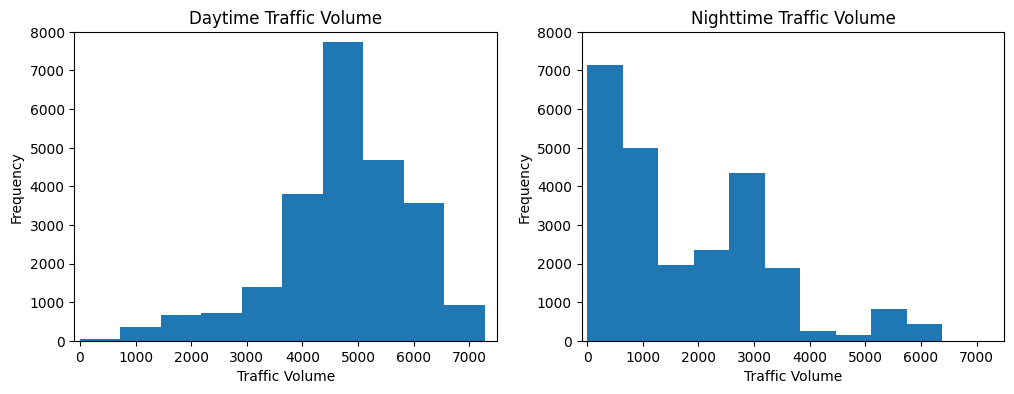

In [8]:
plt.figure(figsize=(12,9))

plt.subplot(2, 2, 1)
day['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlim([-100,7500])
plt.ylim([0,8000])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(2, 2, 2)
night['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlim([-100,7500])
plt.ylim([0,8000])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
# Statistical values of daytime dataset for hour column
# There are 23,877 daytime traffic incidences
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
# Statistical values for nighttime dataset for hour column
# There are 24,327 traffic incidences in the nighttime
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic volume histogram is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The nighttime traffic volume histogram is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

# Time Indicators of Heavy Traffic

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method.

In [11]:
day['month'] = day['date_time'].dt.month

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


## Time Indicator: Month

In [13]:
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

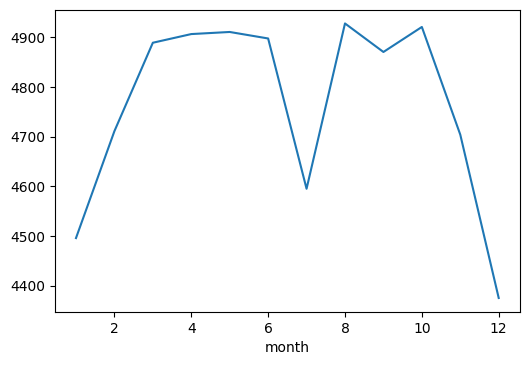

In [14]:
# Generating the line plot for the monthly averages
by_month['traffic_volume'].plot.line()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. There is a sharp decline monthly average traffic volume in July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

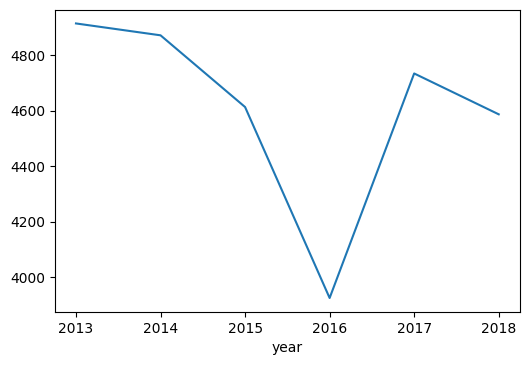

In [15]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicator: Day of the Week

In [16]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

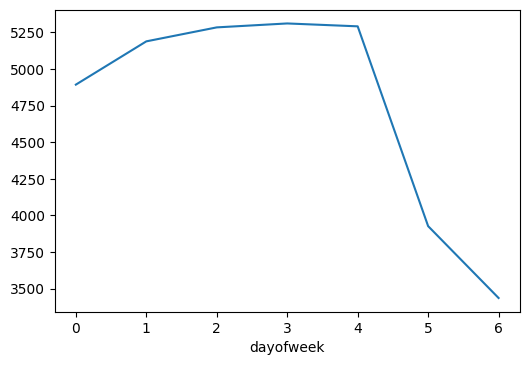

In [17]:
# Generating the line plot for the daily averages
by_dayofweek['traffic_volume'].plot.line()

The average daily traffic volume steadily increases from Monday to Friday and declines from Suturday to Sunday, which implies that the traffic volume is significantly heavier on business days compared to the weekends.

## Time Indicator: Time of Day

Beacuse the weekends will affect our average values, will look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

Below we split the dataset and plot the graphs.

In [18]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


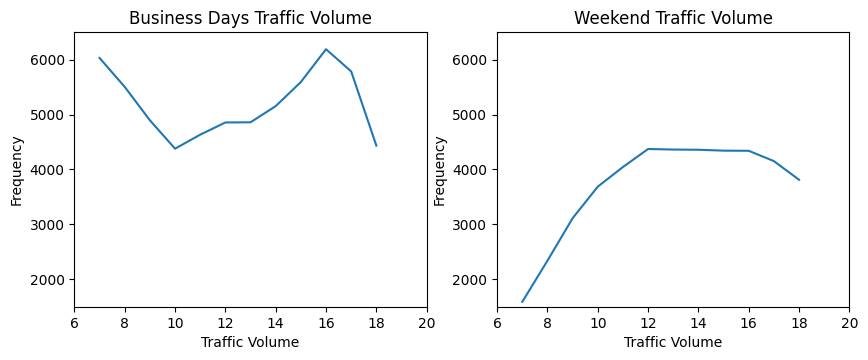

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days Traffic Volume')
plt.xlim([6,20])
plt.ylim([1500,6500])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(2, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Traffic Volume')
plt.xlim([6,20])
plt.ylim([1500,6500])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. This is as is expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

In our quest to find time indicators for heavy traffic we discover the following:

- Traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16. We see volumes of over 6,000 cars at rush hours.


# Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, and `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [20]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  year                 23877 non-null  int64         
 11  dayofweek            23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [21]:
# Correlation between Traffic Volume and Weather
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

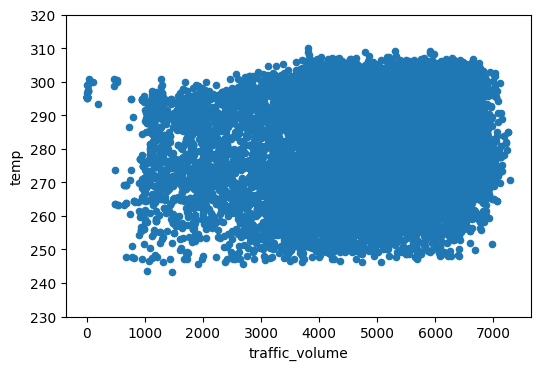

In [22]:
# Correlation between Traffic Volume and Snow
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

From this we can see that temperature doesn't look like a solid indicator of heavy traffic. We need to look at other weather-related columns: weather_main and weather_description.

# Weather Types

In [23]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

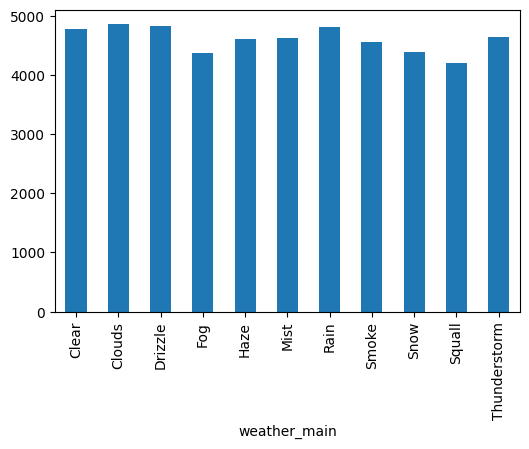

In [24]:
by_weather_main['traffic_volume'].plot.bar()
plt.show()

Traffic volume for all weather types falls just below 5000, so there is no real heavy indicator of heavy traffic here.

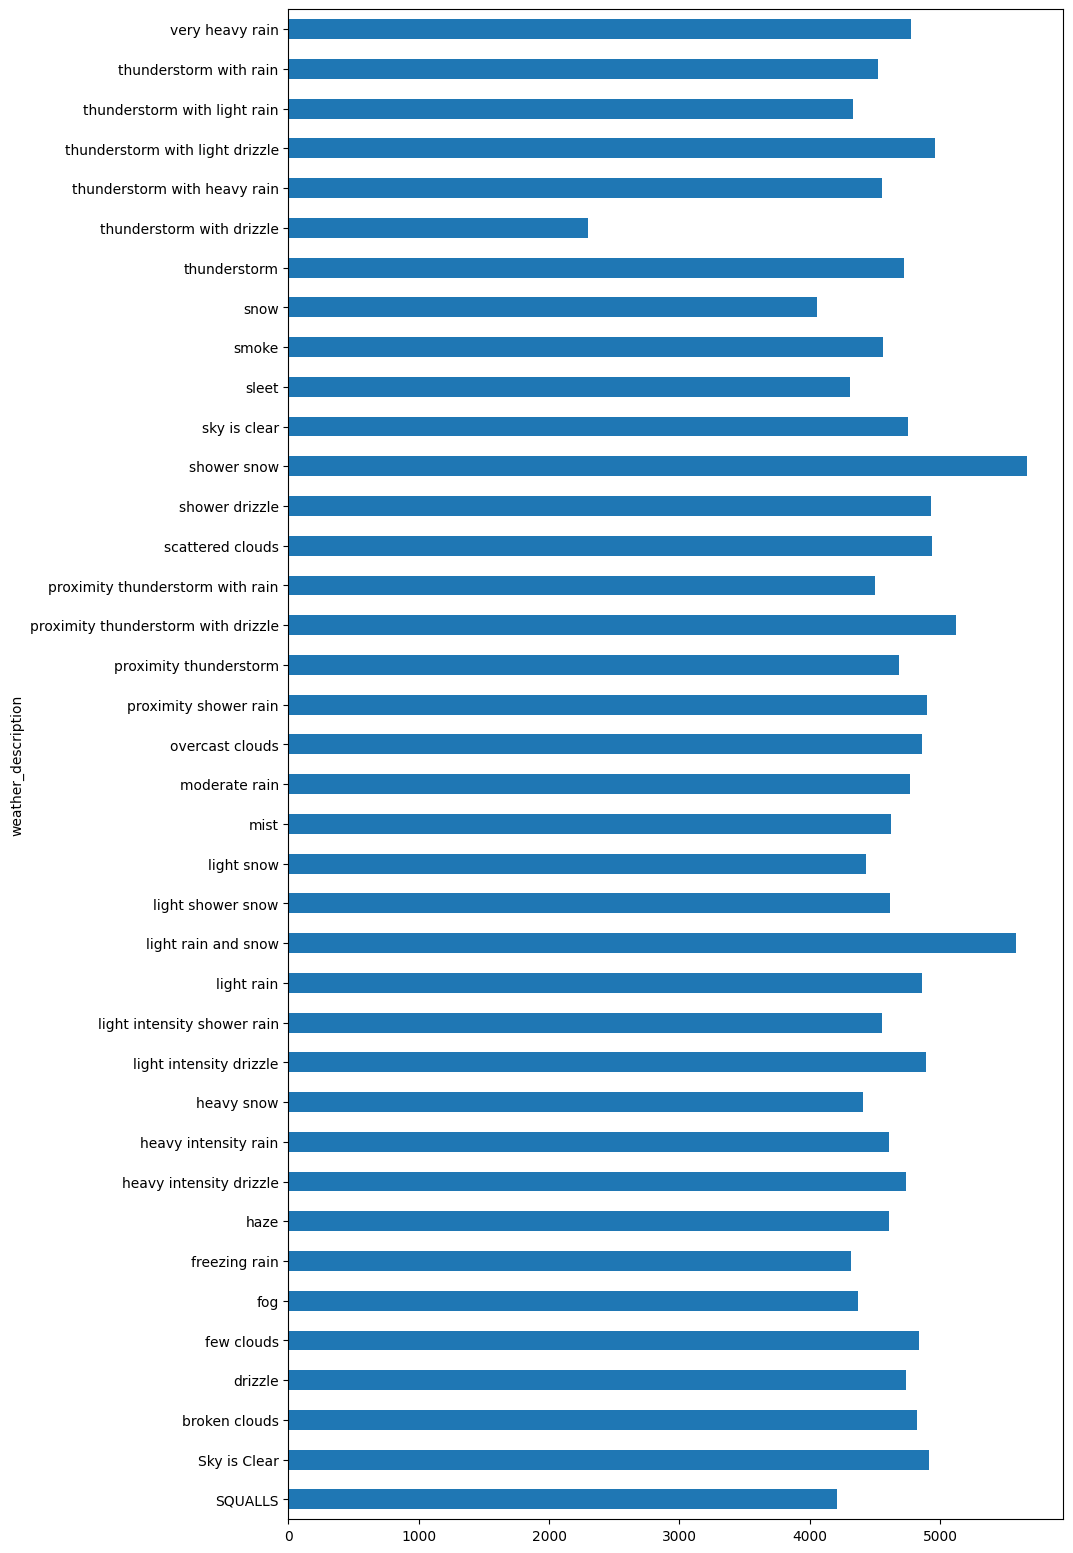

In [25]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))
#plt.figure(figsize=(10,20)) or Series.plot.barh(figsize=(width,height))
plt.show()

There are three weather types that have traffic volume exceeding 5000;
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

This indicates that, these could be indicators of heavy traffic.

# Conclusion

In this project the main aim was to find indicators of heavy traffic on the I-94 Interstate highway. After our analysis of the data, we found two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.


- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle